<img src="https://drive.google.com/uc?id=1E_GYlzeV8zomWYNBpQk0i00XcZjhoy3S" width="100"/>  
# DSGT Bootcamp Week 7: Introduction to ML 

## Learning Objectives  
1)  Learn Three Ways to Conceptualize Models and Data  
2)  Visualize the function of popular ML algorithms    
3)  Understand the Difference Between Classification and Regression   
4)  Implement a range of ML solutions in few lines of code. These include:   
- Classification: Neural Networks, SVMs, Decision Trees 
- Regression: Simple Linear, Multi-Linear, and Polynomia


<img src="https://media.istockphoto.com/vectors/machine-learning-3-step-infographic-artificial-intelligence-machine-vector-id962219860?k=6&m=962219860&s=612x612&w=0&h=yricYyUqZbILMHp3IvtenS3xbRDhu1w1u5kk2az5tbo=" width="400"/>  
(Double click this block for image credit) 



## Setting Up   



In [75]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/My Drive/Track1(AppliedDataScience)/Participants/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/My Drive/Track1(AppliedDataScience)/Participants/Data'
/content/drive/.shortcut-targets-by-id/1BOlwer-ak1Fz-s0_3Ddo-sKdKxDHbUXw/Track1(AppliedDataScience)/Participants/Data


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

#silencing warnings. because they don't really matter and are just ugly to look at
try: 
    import warnings
    warnings.filterwarnings('ignore')
except:
    pass

### There are 3 main ways to consider ML models. 
1) Pictorially  
2) Using decision boundaries  
3) Mathematically    
Let's walk through each of them 

## 1) Pictorially
#### Can you guess which picture corresponds to which algorithm?
a) KNN b) Neural Network c) Decision Tree d) SVM  
 
<img src="https://drive.google.com/uc?id=1ByEo81lbrGis2QDt-AYB6jUEkHGu7idh" height='350'>


## 2) Decision Boundaries  
**Note: Don't worry about the code in this section! All will be explained later in the notebook. Focus on the visualizations**
####  Now we can plot decision boundaries  
Let's quicly use a decision tree, a KNN, an SVM, and a simple neural network   
These are all very popular algorithms in industry and in academia!

In [0]:
from itertools import product

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [78]:
# Load data
iris = datasets.load_iris()
X, y = iris.data[:, [0, 1]], iris.target
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
# Create the classifiers
dt = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=7)
svc = SVC(gamma=.1, kernel='rbf', probability=True)
mlp = MLPClassifier()

In [80]:
# Train the classifiers
dt.fit(X, y)  
knn.fit(X, y)
svc.fit(X, y) 
mlp.fit(X,y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

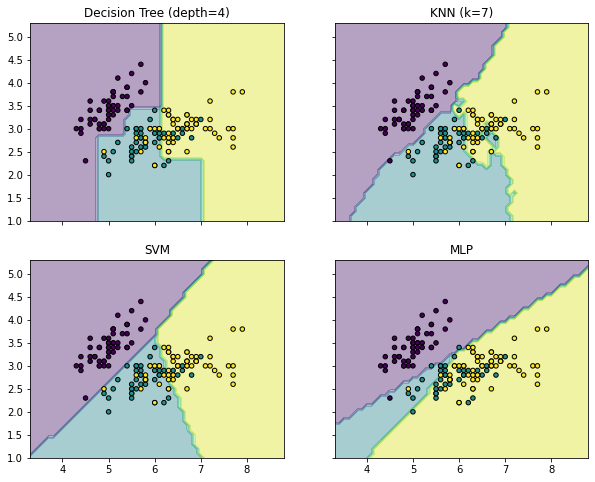

In [81]:
# Plotting decision regions
# Don't panick -- you don't need to understand this code
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [dt, knn, svc, mlp],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'SVM', 'MLP']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

### 3) Mathematic Formulations    
Think: What is a model that is using features to predict a class doing?  
You are taking in as INPUT the columns. You are getting as OUTPUT a classification   
Thus, you are finding a MAPPING between the INPUT and the OUTPUT  

f: X → Y   
f(x) = y

 
<img src="https://drive.google.com/uc?id=1UajmKUVeH3s_yGGvEtSdCffi7UYsbWWg" height='300'>


#### Let's focus on a regression model. Now we can look at the mathematical formula  
Intuition : linear regression looks something like this: y=mx+b   
<img src="https://drive.google.com/uc?id=1MH6qYH3bM8TQ4os6geXhY9HHeD4yXuYk" height='300'>


Here, you can see that the goal of ML is to adjust the PARAMETERS to OPTIMIZE performance 

In [82]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
print(df.shape)
df.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
from sklearn.model_selection import train_test_split
X, Y = df, boston.target

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

Now we can fit a linear regression model to our data.   
There is more than one feature. So y= mx+b is not enough. We need a more complex formulation  
Can you tell me what the parameters are? 

In [13]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print("Score is:",lm.score(X_test,Y_test))

my_formatted_list = [ '%.2f' % i for i in lm.coef_ ]
str1 = 'x + '.join(str(e) for e in my_formatted_list)
print("\n \nFormula is:\n y = ", str1, ' + ', str(lm.intercept_) )

Score is: 0.6956551656111594

 
Formula is:
 y =  -0.16x + 0.04x + -0.03x + 0.79x + -12.95x + 4.00x + -0.01x + -1.37x + 0.34x + -0.01x + -0.99x + 0.01x + -0.47  +  32.85893263408605


###

 See Slide Deck for Examples with Neural Nets, SVMs, and Decision Trees :) 

## Classification vs Regression vs Clustering 
Can you state the difference between classification and regression?  
Which has a discrete and which has a continuous output?
#### See Slide Deck for Visual Explanation of the Differences :)  

## Implementation in Python   

 


Sklearn is a python library that makes Machine Learning occur in very few lines of code  

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" height='100'>  
  
    
      
Using sklearn consists of very few steps   
1) Run import statements   
2) Instantiate your model   
3) Fit your model to the data    
4) Predict using your new model 

In [20]:
df = pd.read_csv('train.csv')
print(df.columns)
df

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

Can we predict the OverallCond (1-10 rating discrete) given:  
-  The LotFrontage, LotArea, TotalBsmtSF, GrLivArea, GarageArea, SalesPrice  

Remember the steps!  
<img src="https://drive.google.com/uc?id=1wXJnftSIBkOYodRlRl0dxbonAUPgG-9W" height='300'>


In [0]:
x = df[['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'SalePrice']] #features
y = df['OverallCond'] # target

In [0]:
# train test split 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)

In [55]:
# knn 

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
print(knn.predict(X_test))
knn.score(X_test, Y_test)

[5 5 5 4 5 5 5 5 5 5 7 6 5 5 6 5 6 5 5 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 5 6 7 5 5 5 5 7 5 5 5 6 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 6 6 5 6 5 5 6 6 5 7
 5 6 5 5 5 5 5 5 5 5 7 5 5 5 5 8 7 5 6 5 5 5 5 5 5 5 5 5 5 6 5 6 5 5 6 5 5
 5 5 6 5 5 4 6 5 5 5 5 5 5 5 5 6 7 6 5 5 3 5 5 5 5 7 7 5 7 5 5 5 5 5 5 5 5
 5 5 5 5 5 6 5 5 7 5 5 5 7 5 7 5 6 5 5 5 5 6 5 6 5 4 6 7 6 5 5 5 5 5 6 5 5
 5 6 6 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5 5 6 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5 5
 5 5 5 5 5 5 4 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 5 7 5 6 5 6 6
 7 5 5 6 5 5 5 5 7 5 3 5 5 5 5 5 5 3 5 5 6 5 5 5 6 5 5 5 6 5 5 7 5 5 5 6 5
 5 5 5 4 7 5 4 7 5 5 5 5 7 5 5 5 5 6 5 4 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 6 4
 5 5 3 5 7 5 5 5 5 5 5 6 5 5 5 7 5 5 5 5 5 5 5 5 6 5 5 5 5 6 5 6 5 5 6 5 7
 5 7 7 5 5 5 5 5 5 7 7 5 5 6 5 6 5 5 5 5 6 4 6 5 5 5 7 5 5 6 5 6 5 6 5 4 5
 5 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 5 7 6 7 5 5 5 5 5 5 6 6 5 5 5 5 5 5 5 5 5
 6 6 5 7 5 5 5 5 7 5 5 6 4 7 5 5 6 5 5 5 5 5 5 6 5 7 5 5 5 5 5 8 5 6 7 5 5
 5]


0.5414937759336099

In [72]:
# SVM
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

svm = SVC(random_state=3)
svm.fit(X_train, Y_train)
# print(svm.predict(X_test))
svm.score(X_test, Y_test)

0.5705394190871369

In [68]:
# Neural Net

from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=2)
nn.fit(X_train, Y_train)
# print(nn.predict(X_test))
nn.score(X_test, Y_test)

0.5684647302904564

In [71]:
from sklearn.tree import DecisionTreeClassifier


dt = DecisionTreeClassifier(random_state=2)
dt.fit(X_train, Y_train)
# print(dt.predict(X_test))
dt.score(X_test, Y_test)

0.4979253112033195

# Conclusion   
In this notebook we learned:   
1)  Learn Three Ways to Conceptualize Models and Data  
2)  Visualize the function of popular ML algorithms    
3)  Understand the Difference Between Classification and Regression 
4)  How to use Sklearn to code machine learning in few lines of code
  - SVMs, Decision Trees, Neural Nets, and K-Nearest Neighbor algorithms 
